# Inital word cloud reviews 

In [1]:
import pandas as pd

import os
import spacy 
from spacy import displacy

import gensim
from gensim.corpora import Dictionary
from gensim.models import LdaModel, CoherenceModel, LsiModel, HdpModel

import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk

In [2]:
# Trying to read with more flexible options
try:
    # Attempt with error handling options
    df = pd.read_csv("./car_review_datasets/Scraped_Car_Review_ford.csv", 
                     error_bad_lines=False,  # Skip bad lines
                     warn_bad_lines=True,    # Warn about them
                     encoding='utf-8')       # Explicit encoding
except:
    # If that doesn't work, try a different approach
    df = pd.read_csv("./car_review_datasets/Scraped_Car_Review_ford.csv", 
                     engine='python',        # Python engine is more flexible
                     encoding='utf-8')       # Explicit encoding

In [3]:
df = df.drop('Unnamed: 0', axis=1)
df_fiesta = df[df["Vehicle_Title"].str.contains("Fiesta", na=False)]
df_fiesta["vehicle_age"] = df_fiesta["Vehicle_Title"].str.extract(r'(\d{4})')[0]
df_fiesta["vehicle_age"] = pd.to_numeric(df_fiesta["vehicle_age"])
df_fiesta = df_fiesta[df_fiesta["vehicle_age"] < 2017]
df_fiesta = df_fiesta.reset_index(drop=True)

/tmp/ipykernel_21419/3309848676.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fiesta["vehicle_age"] = df_fiesta["Vehicle_Title"].str.extract(r'(\d{4})')[0]
/tmp/ipykernel_21419/3309848676.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fiesta["vehicle_age"] = pd.to_numeric(df_fiesta["vehicle_age"])


In [5]:
df_fiesta_reviews = df_fiesta[["Review", "Rating", "Review_Title", "vehicle_age"]].copy()


[nltk_data] Downloading package stopwords to /home/reaf/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


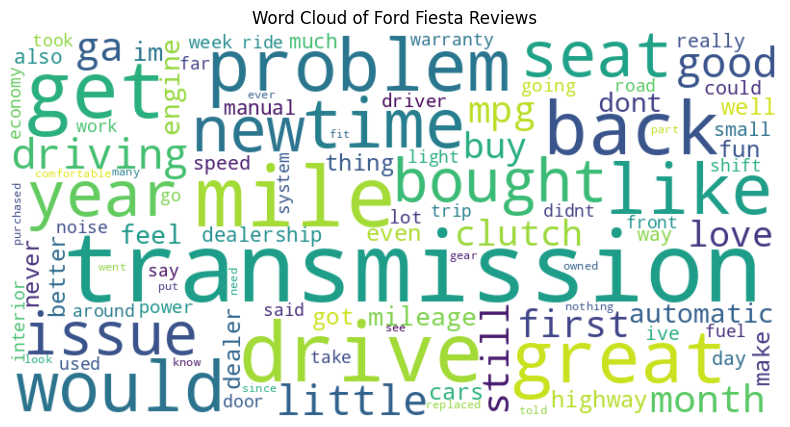

In [ ]:
from wordcloud import WordCloud
import re
from nltk.corpus import stopwords
import matplotlib.pyplot as plt

# Download stopwords if not already available
nltk.download('stopwords')

# Combine all reviews into one text
all_reviews = ' '.join(df_fiesta_reviews['Review'].fillna(''))

# Clean the text
# Remove punctuation and convert to lowercase
all_reviews = re.sub(r'[^\w\s]', '', all_reviews.lower())

# Get stopwords
stop_words = set(stopwords.words('english'))
# Add some additional car-related stopwords
additional_stopwords = {'car', 'ford', 'fiesta', 'vehicle', 'one'}
stop_words = stop_words.union(additional_stopwords)

# Create WordCloud
wordcloud = WordCloud(
    width=800, 
    height=400, 
    background_color='white',
    stopwords=stop_words,
    max_words=100,
    collocations=False
).generate(all_reviews)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Ford Fiesta Reviews')
plt.show()